In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = load_iris()

iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
x = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
def train_validate_test_split(X , y , test_ratio , val_ratio , random_value ):
    np.random.seed(random_value)

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    
    total_size = len(X)
    
    test_size = int(total_size*test_ratio)
    test_val = int(total_size*val_ratio)
    
    X_test = X[:test_size]
    y_test = y[:test_size]
    
    X_val = X[test_size:test_size+test_val]
    y_val = y[test_size:test_size+test_val]
    
    X_train = X[test_size+test_val:]
    y_train = y[test_size+test_val:]
    

    return X_train , X_val , X_test , y_train , y_val , y_test

In [6]:
x_train, x_val, x_test, y_train, y_val, y_test = train_validate_test_split(x, y, 0.3, 0.3, 42)

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60, 4)
(45, 4)
(45, 4)
(60,)
(45,)
(45,)


In [8]:
def draw_decision_boundary(X, y, model):
    # Create a mesh grid to plot decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Make predictions for each point in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

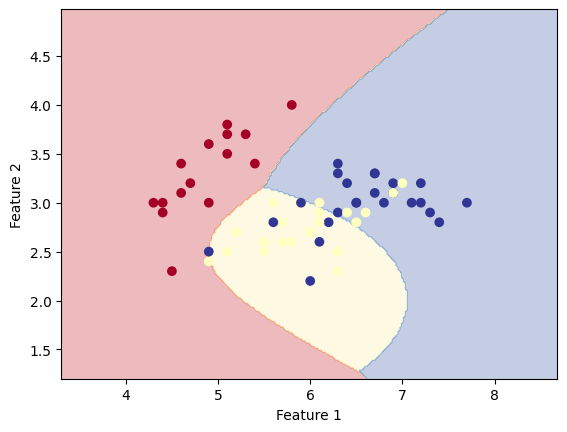

In [9]:
# Select two features for visualization (using sepal length and sepal width)
X_visualization = x[:, [0, 1]]  # Using first two features
X_train_viz = x_train[:, [0, 1]]
X_test_viz = x_test[:, [0, 1]]

# Train model on the selected features
model_viz = GaussianNB()
model_viz.fit(X_train_viz, y_train)

# Draw decision boundary
draw_decision_boundary(X_train_viz, y_train, model_viz)

#### Evaluate the model

In [10]:
model = GaussianNB()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [11]:
def calculate_accuracy(y_preds, y_test):

    accuracy= np.sum(y_test==y_preds) /y_test.size
    #and here i do i take the sum of the arry and i will do a example :
    #y_test = np.array([1, 0, 1, 1, 0])      
    #y_pred = np.array([1, 0, 0, 1, 0])   

    #true+true+false+true+true 
    #the accuracy = 4 / 5 = 0.8 =80%

    return accuracy

In [12]:
accuracy = calculate_accuracy(y_predicted, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777
